# 1. Motivation

## What is our dataset?

In order to tell our story we have collected several datasets. Here is a list:


1.    CO2 and Greenhouse Gas Emissions per country and region through years - dataset [https://github.com/owid/co2-data](https://github.com/owid/co2-data)
2.   Death causes by risk factor - Global Health Data Exchange: [https://ghdx.healthdata.org/gbd-results-tool](https://ghdx.healthdata.org/gbd-results-tool) 
3.   Energy data - Our World in Data: [https://github.com/owid/energy-data](https://github.com/owid/energy-data) 
4. Global temperature anomalies: [https://www.metoffice.gov.uk/hadobs/hadcrut5/](https://www.metoffice.gov.uk/hadobs/hadcrut5/)
5. Air Quality Life Index: [https://aqli.epic.uchicago.edu/the-index/](https://aqli.epic.uchicago.edu/the-index/)



## Why did we choose this/these particular dataset(s)?
Well, we were looking for a big and fairly complete dataset that would have a connection with the climate but also with society. The idea that we pitched in part A of the project turned out to be not as interesting as expected. It's hard to show relations between air pollution and dogs behaviour - there's just to many factors. We focused on climate change and chose CO2 emissions as that was a subject we wanted to learn more about and we had a pretty good idea of how we want to tell the story.

## What was our goal for the end user's experience?
We were hoping to create an elegant website which would be beneficial in some way to the user. We believe everyone can relate to this subject. We wanted to balance between bold statements which would stay with the reader and in-depth paragraphs with some more information if the reader is interested. The flow of the information given on the website was also important to us. We spent some time arranging different parts of the article. Last but not least we wanted to create something elegant and sleek-looking so that the read is as pleasant as possible.

# 2. Basic Stats

## 2.1 CO2 and Greenhouse Gas Emissions

In [ ]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
co2_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/owid-co2-data.csv')
co2_data.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


There's a lot of interesting information (columns) available in the dataset. Our work will mainly focus on total CO2 emissions and CO2 per capita.

iso_code is an information used through out different datasets. it's a three letter code identifying countries and regions. CO2 emissions are in million tonnes.

In [ ]:
# The dataset also contains rows for regions like Europe, Oceania etc.
# Extracting only countries information...
only_countries = co2_data.dropna(subset=['iso_code'])

# For some reason World has it's iso code in the dataset :(
# Deleting world aggregated data
only_countries = only_countries.drop(only_countries[only_countries.iso_code == 'OWID_WRL'].index)

# Leaving only columns which we'll use later on
only_countries_co2 = only_countries[['iso_code', 'country', 'co2', 'co2_per_capita', 'year']]

# Which years is the data from
years = only_countries_co2['year']
max_years = years.max()
min_years = years.min()

print(f'Min year: {min_years}, Max year: {max_years}')

# What is maximum co2 emission recorder - also value used in later analysis
co2 = only_countries_co2['co2']
max_co2 = co2.max()

print(f'Max co2 emission: {max_co2}')

# Number of countries and regions with iso code data was collected from
n = len(pd.unique(only_countries_co2['country']))
print(f'Countries and regions (not recognised by WHO as countries) in dataset: {n}')

Min year: 1750, Max year: 2020
Max co2 emission: 10667.887
Countries and regions (not recognised by WHO as countries) in dataset: 218


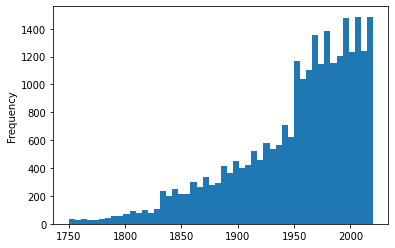

In [ ]:
co2_data['year'].plot.hist(bins=50)

It's worth noting that the older the data the smaller amount of it there is. There's more rows from latest years.

## 2.2 Energy data

This dataset is used by us to get an overview of what are the sources of energy used by countries in the world

In [ ]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/owid-energy-data.csv')
energy_data.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Same situations as for co2 dataset
energy_data_only_countries_with_world = energy_data.dropna(subset=['iso_code'])
energy_data_only_countries = energy_data_only_countries_with_world.drop(energy_data_only_countries_with_world[energy_data_only_countries_with_world.iso_code == 'OWID_WRL'].index)
#Filter data
energy_data_only_countries = energy_data_only_countries[['iso_code', 'country', 'year', 'renewables_share_energy', 'coal_share_energy', 
                'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'solar_share_energy', 'wind_share_energy']]

years = energy_data_only_countries['year']
max_years_energy = years.max()
min_years_energy = years.min()

print(f'Min year: {min_years_energy}, Max year: {max_years_energy}')

Min year: 1900, Max year: 2021


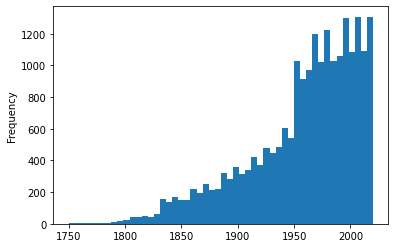

In [ ]:
years.plot.hist(bins=50)

## 2.3 Death causes by risk factor

In [ ]:
death_causes_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/death_causes.csv')
location_ids = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/GBD_Locations-Hierarchy.csv') 
risks_ids = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/GBD_REI-Hierarchy.csv')
location_ids_dict = {}
for index, row in location_ids.iterrows():
  location_ids_dict[row["Location ID"]] = row["Location Name"]

risks_ids_dict = {}
for index, row in risks_ids.iterrows():
  risks_ids_dict[row["REI ID"]] = row["REI Name"]

death_causes_data = death_causes_data.replace({"location" : location_ids_dict})
death_causes_data = death_causes_data.replace({"rei" : risks_ids_dict})

death_causes_data.head()

,location,rei,metric,year,val,upper,lower
0,Global,High fasting plasma glucose,1,1990,2.910089e+06,3.753672e+06,2.340616e+06
1,Global,High fasting plasma glucose,2,1990,6.239971e-02,8.021385e-02,4.993518e-02
2,Global,High systolic blood pressure,1,1990,6.787715e+06,7.495917e+06,6.072706e+06
3,Global,High systolic blood pressure,2,1990,1.455321e-01,1.607639e-01,1.298825e-01
4,Global,High body-mass index,1,1990,2.198130e+06,3.432157e+06,1.205501e+06


In [ ]:
years = death_causes_data['year']
max_years_death_causes = years.max()
min_years_death_causes = years.min()

n = len(pd.unique(death_causes_data['rei']))

print(f'Min year: {min_years_death_causes}, Max year: {max_years_death_causes}')
print(f'Number of unique risk factors: {n}')
print('List of risk factors:')
print(pd.unique(death_causes_data['rei']))

Min year: 1990, Max year: 2019
Number of unique risk factors: 20
List of risk factors:
['High fasting plasma glucose' 'High systolic blood pressure'
 'High body-mass index' 'Low bone mineral density' 'Dietary risks'
 'Unsafe sex' 'Intimate partner violence'
 'Unsafe water, sanitation, and handwashing' 'Air pollution'
 'Other environmental risks' 'Child and maternal malnutrition'
 'Low physical activity' 'Occupational risks' 'Suboptimal temperature'
 'Tobacco' 'Alcohol use' 'Drug use' 'Impaired kidney function'
 'High LDL cholesterol' 'Childhood sexual abuse and bullying']


## 2.4 Global temperature anomalies

In [ ]:
temperature_anomalies_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/global_temperature_anomalies.csv')
temperature_anomalies_data.head()

,Entity,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


In [ ]:
years = temperature_anomalies_data['Year']
max_years_temperature_anomalies = years.max()
min_years_temperature_anomalies = years.min()

print(f'Min year: {min_years_temperature_anomalies}, Max year: {max_years_temperature_anomalies}')

Min year: 1850, Max year: 2019


Quick look at how temperature anomalies behaved globaly:

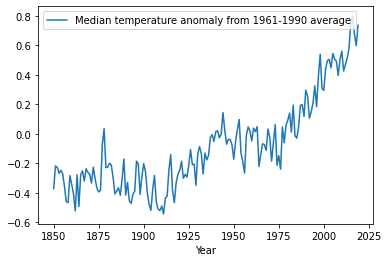

In [ ]:
temperature_anomalies_data[temperature_anomalies_data['Entity']=='Global'].plot.line(x='Year', y='Median temperature anomaly from 1961-1990 average')

## 2.5 Air Quality Life Index

This is data collected by Air quality Life Index. There's lots of columns. pm_{year} columns is information about particulate matter pollution in a given year. llpp_nat_{year} are columns connected to national standard - we don't care about those in our work. llpp_who_{year} are columns representing an estimation of how many years life expectancy has been shortened for a given population in a given year by WHO standards.

In [ ]:
aqli_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/aqli_global_data.csv')
aqli_data.head()

,country,iso_alpha3,whostandard,natstandard,population,pm_1998,pm_1999,pm_2000,pm_2001,pm_2002,...,llpp_nat_2009,llpp_nat_2010,llpp_nat_2011,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018
0,Aruba,ABW,10,0,118013,3.960000,3.650000,3.14,3.33,2.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,10,10,30278455,24.469999,21.889999,29.57,22.74,27.280001,...,1.45,1.42,2.42,1.76,1.67,1.38,1.92,1.19,1.17,2.05
2,Angola,AGO,10,0,31245980,15.470000,12.610000,12.58,14.68,14.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,AIA,10,0,17756,2.700000,1.640000,2.60,2.04,1.390000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Åland,ALA,10,0,29715,5.730000,7.620000,6.89,5.78,6.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Analysis

## Most polluting countries

In [ ]:
# Let's take a look at last 40 years - we have fair amount of data from that period
only_countries_co2_40 = only_countries_co2[only_countries_co2['year'] >= 1980]

# Which country had most emissions each year?
for year in range(1980, 2021):
  year_emissions = only_countries_co2_40[only_countries_co2['year'] == year]
  country = year_emissions[year_emissions['co2'] == year_emissions['co2'].max()]['country'].values[0]
  print(f'year: {year}, country: {country}')

year: 1980, country: United States
year: 1981, country: United States
year: 1982, country: United States
year: 1983, country: United States
year: 1984, country: United States
year: 1985, country: United States
year: 1986, country: United States
year: 1987, country: United States
year: 1988, country: United States
year: 1989, country: United States
year: 1990, country: United States
year: 1991, country: United States
year: 1992, country: United States
year: 1993, country: United States
year: 1994, country: United States
year: 1995, country: United States
year: 1996, country: United States
year: 1997, country: United States
year: 1998, country: United States
year: 1999, country: United States
year: 2000, country: United States
year: 2001, country: United States
year: 2002, country: United States
year: 2003, country: United States
year: 2004, country: United States
year: 2005, country: United States
year: 2006, country: China
year: 2007, country: China
year: 2008, country: China
year: 200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


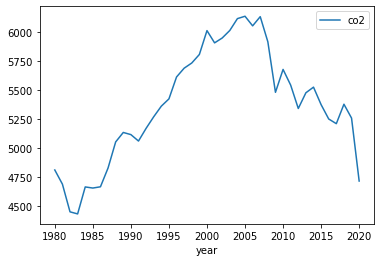

In [ ]:
# USA
usa_co2_emissions = only_countries_co2_40[only_countries_co2['country'] == 'United States']
usa_co2_emissions.plot.line(x='year', y='co2')

Seems that even though USA was a leader in co2 emissions for quite some time, between 2000 and 2005 something changed and started to emit less and less

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


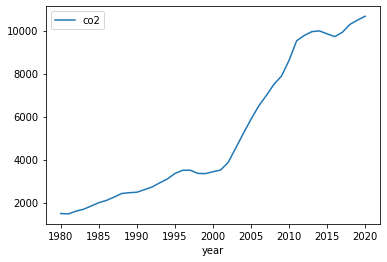

In [ ]:
# China
china_co2_emissions = only_countries_co2_40[only_countries_co2['country'] == 'China']
china_co2_emissions.plot.line(x='year', y='co2')

China really don't care that much... They exceeded USA emissions and don't seem to stop

In [ ]:
# Change in China's emissions
china_1980 = china_co2_emissions[china_co2_emissions['year']==1980]['co2'].values[0]
china_2020 = china_co2_emissions[china_co2_emissions['year']==2020]['co2'].values[0]
print(china_1980, china_2020)
print(f'China co2 emissions increased by {(china_2020-china_1980) * 100/china_1980} %')

1494.496 10667.887
China co2 emissions increased by 613.8116796565531 %


China's emissions increased by almost 614% in last 40 years!

## What is the share of global co2 emissions?

In [ ]:
countries_2020 =  only_countries_co2_40.loc[only_countries_co2_40['year'] == 2020]
top10 = countries_2020.nlargest(10, 'co2')
world_2020 = co2_data[(co2_data.year == 2020) & (co2_data.iso_code=='OWID_WRL')]['co2']
top10['perc'] = top10['co2']*100/float(world_2020)
top10

,iso_code,country,co2,co2_per_capita,year,perc
4723,CHN,China,10667.887,7.412,2020,30.648455
24661,USA,United States,4712.771,14.238,2020,13.539621
11277,IND,India,2441.792,1.769,2020,7.015180
19597,RUS,Russia,1577.136,10.807,2020,4.531055
12336,JPN,Japan,1030.775,8.150,2020,2.961379
11595,IRN,Iran,745.035,8.870,2020,2.140459
9619,DEU,Germany,644.310,7.690,2020,1.851079
20269,SAU,Saudi Arabia,625.508,17.967,2020,1.797062
21590,KOR,South Korea,597.605,11.656,2020,1.716898
11409,IDN,Indonesia,589.500,2.155,2020,1.693612


China USA and India are emitting more than 51% of global co2!

## But what about emissions per capita?

In [ ]:
top10_per_capita = countries_2020.nlargest(10, 'co2_per_capita')
top10_per_capita

,iso_code,country,co2,co2_per_capita,year
19172,QAT,Qatar,106.655,37.019,2020
16343,NCL,New Caledonia,8.693,30.448,2020
15463,MNG,Mongolia,88.442,26.978,2020
23331,TTO,Trinidad and Tobago,35.509,25.373,2020
3633,BRN,Brunei,10.158,23.220,2020
12817,KWT,Kuwait,88.935,20.825,2020
2159,BHR,Bahrain,34.960,20.546,2020
5495,CUW,Curacao,3.335,20.323,2020
20269,SAU,Saudi Arabia,625.508,17.967,2020
12598,KAZ,Kazakhstan,291.336,15.516,2020


Hmm China, US and India are not even in top 10. How do they hold up - per capita?

In [ ]:
countries_2020.loc[countries_2020['country'].isin(['United States', 'China', 'India'])]

,iso_code,country,co2,co2_per_capita,year
4723,CHN,China,10667.887,7.412,2020
11277,IND,India,2441.792,1.769,2020
24661,USA,United States,4712.771,14.238,2020


In [ ]:
print(f'India had {14.238/1.769} times less pollution per capita than US in 2020')

India had 8.048615036743923 times less pollution per capita than US in 2020


India had 8 times less pollution per capita than US in 2020!

## How popular are renewable sources of energy?

In [ ]:
energy_data[energy_data['country']=='World']
fossil_energy_data = energy_data[['fossil_share_energy', 'year', 'country']]
fossil_energy_data[fossil_energy_data['country']=='World']

,fossil_share_energy,year,country
16732,NaN,1900,World
16733,NaN,1901,World
16734,NaN,1902,World
16735,NaN,1903,World
16736,NaN,1904,World
...,...,...,...
16849,85.157,2017,World
16850,84.834,2018,World
16851,84.275,2019,World
16852,83.139,2020,World


In 2020 more than 83% of energy came from fossil fuels! :(

## How air pollution actually affect humans?

In [ ]:
global_death_causes_data_2019 = death_causes_data.query("location == 'Global' and year == 2019 and metric == 1")
global_death_causes_data_2019

,location,rei,metric,year,val,upper,lower
232614,Global,High fasting plasma glucose,1,2019,6.501398e+06,8.363053e+06,5.110278e+06
232616,Global,High systolic blood pressure,1,2019,1.084560e+07,1.213085e+07,9.514141e+06
232618,Global,High body-mass index,1,2019,5.019360e+06,7.110736e+06,3.223364e+06
232620,Global,Low bone mineral density,1,2019,4.378844e+05,4.955212e+05,3.611045e+05
232622,Global,Dietary risks,1,2019,7.943046e+06,9.757377e+06,6.472323e+06
232624,Global,Low physical activity,1,2019,8.315020e+05,1.470299e+06,4.270759e+05
232626,Global,Occupational risks,1,2019,1.220501e+06,1.373473e+06,1.076746e+06
232628,Global,"Unsafe water, sanitation, and handwashing",1,2019,1.656887e+06,2.312688e+06,1.198865e+06
232630,Global,Air pollution,1,2019,6.671740e+06,7.489437e+06,5.904631e+06
232632,Global,Other environmental risks,1,2019,9.854190e+05,1.394597e+06,6.178061e+05


Air pollution contributed to 6.67 million deaths in 2019!

## We could live longer?

On a more personal note we are interested in how much longer could family and friends from our country - Poland - live if co2 emissions weren't as high.

In [ ]:
life_expectancy_2005 = aqli_data[['llpp_who_2005', 'country']]
life_expectancy_2005[life_expectancy_2005['country'] == 'Poland']

,llpp_who_2005,country
171,1.49,Poland


Life expectancy shortened almost 1.5 years in Poland in 2005! That's a wow

# 4. Genre

## Genre of data story

We decided to use the magazine style of data story. We thought it would best suit the narrative that we wanted to convey. We wanted to show the reader the overview of the global carbon emissions problem as well as some of its specific aspects. To that end we chose to describe the problem through text, highlighting some key takeaways and support  it with embedded visualizations. We made some of them interactive to further engage the reader as well as make it easier to make comparisons between different variables or time periods. 

## Visual narrative tools

On our website we implement a number of Visual Narrative tools. From the Visual Structure category first we start with a splash screen in a minimalistic style. We use it to communicate to the reader what the article will be about. We carry this minimalistic style throughout the rest of the site as well as keep the visual elements similar to make the overall visual platform consistent. 

Furthermore we use Highlighting category tools to guide the reader's attention. We implement feature distinction to bring out the most important takeaways as well as key elements of the visualizations. This is easier to achieve thanks to the contrast with the overall style of the article. 

As for the Transition Guidance, we decided against implementing animated transitions as we thought it wouldn’t fit the style of the site well. However we still wanted to add some type of transitional element between separate sections. That’s why we used the thematic gifs at the end of each of them. We believe they are distinctive enough from the other elements in the article to provide a good separator while not being too distracting.

## Narrative structure tools

When it comes to the Narrative Structure we used a number of tools in order to give our narrative a proper shape. From the Ordering category we opted for the linear one. This was because we constructed the story we wanted to tell to be a specific sequence of visual and text elements so it made sense to take the reader through it one part at a time.

From the Interactivity category we implemented hover details for our map visualizations to give the reader the ability to check the data for a specific country. The other visualizations have hover tooltips to help with readability. Additionally for some of the graphs we added the selection option to make it possible to see different aspects of the presented issues.

Lastly from the Messaging category as for the style of our data story we used the accompanying article to convey the narrative we wanted the reader to experience. Moreover we made use of captions and headlines to divide the site into sections and guide the reader through it.


# 5. Visualisations

## Set up code

### Imports

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 11.0 MB/s 
     |████████████████████████████████| 16.7 MB 394 kB/s 
     |████████████████████████████████| 6.3 MB 36.8 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, reset_output, output_notebook, show, output_file, curdoc, save
from bokeh.models import  ColumnDataSource, Legend, HoverTool, LinearAxis, Range1d, GeoJSONDataSource, LinearColorMapper, ColorBar, CustomJS, Slider, HoverTool, LabelSet, WheelZoomTool, FactorRange, PrintfTickFormatter
from bokeh.layouts import layout
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import curdoc
from bokeh.plotting import figure
import geopandas as gpd
import json
import math
from bokeh.palettes import mpl
from bokeh.layouts import column
from bokeh.embed import components, json_item

output_notebook() # This is to make sure that bokeh plots in the notebook

### Loading geo shapes

In [ ]:
# To load geo shape data the files found in the following link are needed:
# https://github.com/wojciechciok/co2_emissions/tree/main/datasets/geodata

shapefile = 'ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[gdf[gdf['country'] == 'Antarctica'].index])

### Loading CO2 emissions data

In [ ]:
co2_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/owid-co2-data.csv')

## Emissions by continent in time chart

### Code

In [ ]:
palette = mpl['Inferno'][8]

emissions_data = co2_data[['iso_code', 'country', 'year', 'co2']]
emissions_data['year'] = pd.to_datetime(emissions_data['year'], format='%Y')
world = emissions_data[emissions_data.iso_code == 'OWID_WRL']
africa = emissions_data[emissions_data.country == 'Africa']
europe = emissions_data[emissions_data.country == 'Europe']
asia = emissions_data[emissions_data.country == 'Asia']
north_america = emissions_data[emissions_data.country == 'North America']
oceania = emissions_data[emissions_data.country == 'Oceania']
south_america = emissions_data[emissions_data.country == 'South America']

world['region_name'] = 'World'
africa['region_name'] = 'Africa'
europe['region_name'] = 'Europe'
asia['region_name'] = 'Asia'
north_america['region_name'] = 'North America'
oceania['region_name'] = 'Oceania'
south_america['region_name'] = 'South America'

source_world = ColumnDataSource(world)
source_africa = ColumnDataSource(africa)
source_europe = ColumnDataSource(europe)
source_asia = ColumnDataSource(asia)
source_north_america = ColumnDataSource(north_america)
source_oceania = ColumnDataSource(oceania)
source_south_america = ColumnDataSource(south_america)
hover = HoverTool(tooltips = [ ("region", "@region_name")])

emmisions_by_continent_figure = figure(x_axis_type="datetime", title = 'Emissions of CO2 by region', plot_height = 700 , plot_width = 600)
emmisions_by_continent_figure.line(x='year', y='co2', source=source_world, line_color=palette[1], legend_label='World')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_africa, line_color=palette[2], legend_label='Africa')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_europe, line_color=palette[3], legend_label='Europe')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_asia, line_color=palette[4], legend_label='Asia')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_north_america, line_color=palette[5], legend_label='North America')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_oceania, line_color=palette[6], legend_label='Oceania')
emmisions_by_continent_figure.line(x='year', y='co2', source=source_south_america, line_color=palette[0], legend_label='South America')
emmisions_by_continent_figure.legend.location = "top_left"
emmisions_by_continent_figure.add_tools(hover)
emmisions_by_continent_figure.xaxis.axis_label = 'Year'
emmisions_by_continent_figure.yaxis.axis_label = 'Emissions in million tonnes'

### Visualizaion

In [ ]:
show(emmisions_by_continent_figure)

### Explanation

For our opening visualization we decided to use the line graph showing CO2 emissions in millions of tonnes globally as well as by continent from the year 1750 to 2020. We wanted to start off by showing the reader the overall trend in CO2 emissions through the years as well as presenting specific continents' contributions to those emissions. We wanted to convey that even though the rapid increases in greenhouse gasses emissions is relatively recent it quickly ramped up to alarming levels.

## CO2 emissions map

### Code

In [ ]:
co2_only_countries = co2_data.dropna(subset=['iso_code'])
co2_only_countries = co2_only_countries.drop(co2_only_countries[co2_only_countries.iso_code == 'OWID_WRL'].index)
#Filter data for year co2 map.
co2_only_countries = co2_only_countries[['iso_code', 'country', 'co2', 'co2_per_capita', 'year']]
co2 = co2_only_countries['co2']
years = co2_only_countries['year']
max_years = years.max()
min_years = years.min()
max_co2 = co2.max()

In [ ]:
def json_data(selectedYear):
    yr = selectedYear
    df_yr = co2_only_countries[co2_only_countries['year'] == yr]
    merged = gdf.merge(df_yr, left_on = 'country_code', right_on ='iso_code', how = 'left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

In [ ]:
selected_year = 1980

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(selected_year))
#Define a sequential multi-hue color palette.
palette = mpl['Inferno'][256]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(
    palette=palette,
    low = 0,
    high = max_co2,
    nan_color = '#d9d9d9'
)
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country_y'),('CO2 emmisions', '@co2{0.00}')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper,label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
emissions_map_figure = figure(title = 'CO2 emissions in million tonnes in '+str(selected_year), plot_height = 500 , plot_width = 900, toolbar_location = None, tools=[hover])
emissions_map_figure.xgrid.grid_line_color = None
emissions_map_figure.ygrid.grid_line_color = None
emissions_map_figure.axis.visible = False
#Add patch renderer to figure. 
emissions_map_figure.patches('xs','ys', source = geosource,fill_color = {'field' :'co2', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
emissions_map_figure.add_layout(color_bar, 'below')

#Display plot inline in Jupyter notebook
output_notebook()

### Visualization

In [ ]:
show(emissions_map_figure)

### Explanation


The next visualization is a world map with countries colored based on the amount of the CO2 (measured in millions of tonnes) they emited in a given year. With this visualization we wanted to show the differences in raw values of CO2 emissions by country through the years. The goal is mostly to present the changes in the emissions for each of the countries at the same time.

## Top 10 emissions by coutry in 2020

### Code

In [ ]:
countries_2020 =  co2_only_countries.loc[co2_only_countries['year'] == 2020]
top10 = countries_2020.nlargest(10, 'co2')

In [ ]:
palette = mpl['Inferno'][256]


world_2020 = co2_data[(co2_data.year == 2020) & (co2_data.iso_code=='OWID_WRL')]['co2']
top10['perc'] = top10['co2']*100/float(world_2020)
top10['perc'] = top10['perc'].round(decimals = 1)
top10['perc'] = top10['perc'].astype(str) + '%'
top10['color'] = top10['co2']*256/30700
colors_values = top10['color'].tolist()
colors = []
for val in colors_values:
  colors.append(palette[255 - int(val)])
top10['color'] = colors

source = ColumnDataSource(top10)

top_10_emissions_figure = figure(x_range=top10['country'], title = 'Top 10 CO2 emitting countries in 2020 with indication of global share of emissions', plot_height = 500 , plot_width = 800)

labels = LabelSet(x='country', y='co2', text='perc', level='glyph',
        x_offset=-14, y_offset=0, source=source, render_mode='canvas')
top_10_emissions_figure.yaxis.axis_label = 'Emissions in million tonnes'



top_10_emissions_figure.vbar(source=source,x='country', top='co2',bottom=0,width=0.9,color='color')

top_10_emissions_figure.add_layout(labels)

### Visualization

In [ ]:
show(top_10_emissions_figure)

### Explanation

Next up is a bar plot showing % values for the top 10 CO2 emitting countries in 2020. The point of this visualization was to really drive home how few countries in the world are actually responsible for the huge amount of CO2 emission. We decided to use threshold based coloring to highlight the value differences between specific countries even further.

## CO2 emissions per capita map

### Code 

In [ ]:
selected_year = 2020

co2_per_capita = co2_only_countries[co2_only_countries.year==2020]['co2_per_capita']
max_co2_per_capita = co2_per_capita.max()

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(selected_year))
#Define a sequential multi-hue color palette.
palette = mpl['Inferno'][256]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(
    palette=palette,
    low = 0,
    high = max_co2_per_capita,
    nan_color = '#d9d9d9'
)
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country_y'),('CO2 emmisions', '@co2_per_capita')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper,label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
emissions_per_capita_map_figure = figure(title = 'CO2 emissions per capita in tonnes in '+str(selected_year), plot_height = 500 , plot_width = 900, toolbar_location = None, tools=[hover])
emissions_per_capita_map_figure.xgrid.grid_line_color = None
emissions_per_capita_map_figure.ygrid.grid_line_color = None
emissions_per_capita_map_figure.axis.visible = False
#Add patch renderer to figure. 
emissions_per_capita_map_figure.patches('xs','ys', source = geosource,fill_color = {'field' :'co2_per_capita', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
emissions_per_capita_map_figure.add_layout(color_bar, 'below')

#Display plot inline in Jupyter notebook
output_notebook()

### Visualization

In [ ]:
show(emissions_per_capita_map_figure)

### Explanation

Finally in this section we decided to put the map similar to the first one but with per capita values. We thought it would be beneficial to show average emissions per country in the world because with the raw values bigger countries dominate. It is expected that the more people the country has, the more CO2 it emits for its infrastructure and industry to operate. The per capita values in our opinion better illustrate how well every country is managing its greenhouse gasses emissions. And that’s why we decided to put it as the last graph in this section.

## Energy sources % share map

### Code 

In [ ]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/owid-energy-data.csv')

In [ ]:
energy_data_only_countries_with_world = energy_data.dropna(subset=['iso_code'])
energy_data_only_countries = energy_data_only_countries_with_world.drop(energy_data_only_countries_with_world[energy_data_only_countries_with_world.iso_code == 'OWID_WRL'].index)
#Filter data
energy_data_only_countries = energy_data_only_countries[['iso_code', 'country', 'year', 'renewables_share_energy', 'coal_share_energy', 
                'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'solar_share_energy', 'wind_share_energy']]

years = energy_data_only_countries['year']
max_years_energy = years.max()
min_years_energy = years.min()

In [ ]:
# Define a list of energy types to draw on a map
energy_types = ['fossil', 'coal', 'oil', 'gas', 'nuclear', 'renewables', 'hydro', 'solar', 'wind']

In [ ]:
def json_data_energy(selectedYear):
    yr = selectedYear
    df_yr = energy_data_only_countries[energy_data_only_countries['year'] == yr]
    merged = gdf.merge(df_yr, left_on = 'country_code', right_on ='iso_code', how = 'left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data
def get_max_energy_share_value(energy_column, selected_year):
    df_yr = energy_data_only_countries[energy_data_only_countries['year'] == selected_year]
    energy_yr = df_yr[energy_column]
    return energy_yr.max()

In [ ]:
selected_year = 2020

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data_energy(selected_year))
#Define a sequential multi-hue color palette.
palette = mpl['Inferno'][256]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

energy_figures_dict = {}

for energy_type in energy_types:

  selected_column_name = energy_type + "_share_energy"
  #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
  color_mapper = LinearColorMapper(
      palette=palette,
      low = 0,
      high = 100,
      nan_color = '#d9d9d9'
  )
  #Add hover tool
  hover = HoverTool(tooltips = [ ('Country/region','@country_y'),('% share of the ' + energy_type + ' energy', '@'+ selected_column_name)])
  #Create color bar. 
  color_bar = ColorBar(color_mapper=color_mapper,label_standoff=8,width = 500, height = 20,
  border_line_color=None,location = (0,0), orientation = 'horizontal')
  #Create figure object.
  energy_share_map_figure = figure(title = 'Share of the ' + energy_type + ' energy in '+str(selected_year), plot_height = 500 , plot_width = 900, toolbar_location = None, tools=[hover])
  energy_share_map_figure.xgrid.grid_line_color = None
  energy_share_map_figure.ygrid.grid_line_color = None
  energy_share_map_figure.axis.visible = False
  #Add patch renderer to figure. 
  energy_share_map_figure.patches('xs','ys', source = geosource,fill_color = {'field' : selected_column_name, 'transform' : color_mapper},
            line_color = 'black', line_width = 0.25, fill_alpha = 1)
  #Specify layout
  energy_share_map_figure.add_layout(color_bar, 'below')

  energy_figures_dict[energy_type] = energy_share_map_figure

In [ ]:
energy_map_tabs_list = []
for energy_type in energy_types:
  l = layout([[energy_figures_dict[energy_type]]])
  tab = Panel(child=l, title=energy_type)
  energy_map_tabs_list.append(tab)

energy_map_tabs = Tabs(tabs=energy_map_tabs_list)
curdoc().add_root(energy_map_tabs)

### Visualization

In [ ]:
show(energy_map_tabs)

### Explanation

Next presented visualization shows the map of the world with the countries colored based on the % share of the given source of energy in its overall energy production. We implemented it as an interactive map where the reader can switch between the energy sources so the differences between them for every country are easily observable. As energy production is one of the main causes of the CO2 emission we wanted to show the readed how those energy sources stack up for every country.

## CO2 emissions graph vs % share of reneable energy

### Code

In [ ]:
renewable_energy_data_only_countries = energy_data_only_countries_with_world[['iso_code', 'country', 'year', 'renewables_share_energy']]
emissions_data_for_merge = co2_data[['iso_code', 'country', 'year', 'co2']]

In [ ]:
merged_energy = pd.merge(renewable_energy_data_only_countries, emissions_data_for_merge, how='inner', left_on=["iso_code", "year"], right_on=["iso_code", "year"])

In [ ]:
merged_energy = merged_energy[merged_energy["renewables_share_energy"].notna()]
merged_energy = merged_energy[merged_energy["co2"].notna()]
merged_energy['year'] = pd.to_datetime(merged_energy['year'], format='%Y')

In [ ]:
# List of countries chosen to show on the map
chosen_counties = {'the World' : 'OWID_WRL', 'Sweden' : 'SWE', 'Denmark' : "DNK", 'Poland' : 'POL', 'USA' : "USA", 'China' : 'CHN'}

In [ ]:
coutry_codes = list(chosen_counties.values())
merged_energy = merged_energy.query("iso_code in {0}".format(coutry_codes))
emmisions_vs_renewables_figures_dict = {}
renewable_max = merged_energy["renewables_share_energy"].max() + 5
for key, value in chosen_counties.items():
  merged_energy_for_selected_country = merged_energy.query("iso_code == '{code}'".format(code = value))
  palette = mpl['Inferno'][8]
  source_energy = ColumnDataSource(merged_energy_for_selected_country)

  co2_max = merged_energy_for_selected_country["co2"].max()
  

  emissions_vs_renewables_figure = figure(x_axis_type="datetime", title = 'Emissions of CO2 in billion of tonnes vs % share of renewable energy in ' + key, plot_height = 700 , plot_width = 600, y_range = (0, math.ceil(renewable_max)))
  renewables_plot = emissions_vs_renewables_figure.line(x='year', y='renewables_share_energy', source=source_energy, line_color=palette[5], legend_label='% share of renewable energy', name='renewables_share_energy')
  emissions_vs_renewables_figure.add_tools(HoverTool(renderers=[renewables_plot], tooltips=[("% share of renewables energy production", '@renewables_share_energy{0.2f} %')]))
  emissions_vs_renewables_figure.yaxis.axis_label = "% of renewable energy share"

  emissions_vs_renewables_figure.extra_y_ranges = {"co2": Range1d(start=0, end=co2_max)}
  emissions_vs_renewables_figure.add_layout(LinearAxis(y_range_name="co2", axis_label="CO2 emmision in milions of tonnes"), 'right')
  co2_plot = emissions_vs_renewables_figure.line(x='year', y='co2', source=source_energy, line_color=palette[1], legend_label='CO2 emmision', name='co2', y_range_name="co2")
  emissions_vs_renewables_figure.add_tools(HoverTool(renderers=[co2_plot], tooltips=[("CO2 emmisions in milions of tonnes", '@co2{0.00}')]))
  emissions_vs_renewables_figure.legend.location = "top_left"

  emmisions_vs_renewables_figures_dict[key] = emissions_vs_renewables_figure

In [ ]:
emmisions_vs_renewables_tabs_list = []
for key in chosen_counties:
  l = layout([[emmisions_vs_renewables_figures_dict[key]]])
  tab = Panel(child=l, title=key)
  emmisions_vs_renewables_tabs_list.append(tab)

emmisions_vs_renewables_tabs = Tabs(tabs=emmisions_vs_renewables_tabs_list)
curdoc().add_root(emmisions_vs_renewables_tabs)

### Visualization

In [ ]:
show(emmisions_vs_renewables_tabs)

### Explanation

As mentioned before since energy production is one of the main sources of the CO2 emissions we wanted to look into the possible connection between the % of the given country's energy coming from renewable sources and the amount of CO2 it produces. In this visualization we are showing exactly that on the line graph with a double y axis. The visualization has tabs allowing the reader to switch between selected countries (the selected countries list can be changed in the notebook). 

## Death count by risk factor

### Code

In [ ]:
death_causes_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/death_causes.csv')
location_ids = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/GBD_Locations-Hierarchy.csv') 
risks_ids = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/GBD_REI-Hierarchy.csv')

In [ ]:
location_ids_dict = {}
for index, row in location_ids.iterrows():
  location_ids_dict[row["Location ID"]] = row["Location Name"]

risks_ids_dict = {}
for index, row in risks_ids.iterrows():
  risks_ids_dict[row["REI ID"]] = row["REI Name"]

In [ ]:
death_causes_data = death_causes_data.replace({"location" : location_ids_dict})
death_causes_data = death_causes_data.replace({"rei" : risks_ids_dict})
global_death_causes_data_2019 = death_causes_data.query("location == 'Global' and year == 2019 and metric == 1")

In [ ]:
global_death_causes_data_2019 = global_death_causes_data_2019[["rei", "val"]]
global_death_causes_data_2019 = global_death_causes_data_2019.sort_values("val", ascending=False).head(15)
global_death_causes_data_2019["val"] = global_death_causes_data_2019["val"] / 1000000.0
global_death_causes_data_2019 = global_death_causes_data_2019.iloc[::-1]

In [ ]:
palette = mpl['Inferno'][8]
global_death_causes_data_2019["color"] = palette[6]
global_death_causes_data_2019.loc[global_death_causes_data_2019["rei"] == "Air pollution", "color"] = palette[2]

In [ ]:
death_causes_source = ColumnDataSource(global_death_causes_data_2019)

death_count_by_risk_factor_figure = figure(title = 'Number of deaths by risk factor globally in 2019', y_range= FactorRange(factors=global_death_causes_data_2019['rei']),  plot_height = 500 , plot_width = 800)
death_count_by_risk_factor_figure.add_tools(HoverTool(tooltips=[("Number of deaths", '@val{0.00} millions')]))
death_count_by_risk_factor_figure.yaxis.axis_label = 'Risk factors'
death_count_by_risk_factor_figure.xaxis.axis_label = "Number of deaths"
death_count_by_risk_factor_figure.xaxis.formatter = PrintfTickFormatter(format='%f millions')
death_count_by_risk_factor_figure.hbar(source= death_causes_source,y = 'rei', right='val', height=0.8, color="color")

GlyphRenderer(id='4786', ...)

### Visualization

In [ ]:
show(death_count_by_risk_factor_figure)

### Explanation

The visualizations in this section are about some of the consequences of the high CO2 emissions. The first one is a horizontal bar plot showing the number of deaths in 2019 by the risk factor based on data from the 2019 Global Burden of Disease study. With this visualization we wanted to depict how serious of an impact can CO2 pollution have on humans. Our goal was to show air pollution as a major threat for people. We decided to use a simple highlight on the bar plot to indicate the data we want the reader to focus on.

## Global annual temperature anomalies vs global CO2 emissions

### Code

In [ ]:
temperature_anomalies_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/global_temperature_anomalies.csv')

In [ ]:
temperature_anomalies_data = temperature_anomalies_data.query("Entity == 'Global'")
temperature_anomalies_data = temperature_anomalies_data.rename(columns={"Year" :"year", "Median temperature anomaly from 1961-1990 average" : "median_temperature"})
temperature_anomalies_data = temperature_anomalies_data[["year", "median_temperature"]]

In [ ]:
emissions_data = co2_data[['iso_code', 'country', 'year', 'co2']]
world = emissions_data[emissions_data.iso_code == 'OWID_WRL']

In [ ]:
emissions_temperature_merged_data = world.merge(temperature_anomalies_data, left_on = 'year', right_on ='year', how = 'inner')
emissions_temperature_merged_data['year'] = pd.to_datetime(emissions_temperature_merged_data['year'], format='%Y')
emissions_temperature_merged_data_surce = ColumnDataSource(emissions_temperature_merged_data)

In [ ]:
palette = mpl['Inferno'][8]

co2_max_world = emissions_temperature_merged_data["co2"].max()

temperature_anomalies_vs_emissions_figure = figure(x_axis_type="datetime", title = 'Global annual temperature anomalies median vs global CO2 emmisions', plot_height = 700 , plot_width = 600, y_range = (-1, 2))
temperatures_plot = temperature_anomalies_vs_emissions_figure.line(x='year', y='median_temperature', source=emissions_temperature_merged_data_surce, line_color=palette[5], 
                           legend_label='Annual temperature anomalies median (°C)', name='median_temperature')
temperature_anomalies_vs_emissions_figure.add_tools(HoverTool(renderers=[temperatures_plot], tooltips=[("Annual temperature anomalies median (°C)", '@median_temperature')]))
temperature_anomalies_vs_emissions_figure.yaxis.axis_label = "Annual temperature anomalies median (°C)e"

temperature_anomalies_vs_emissions_figure.extra_y_ranges = {"co2": Range1d(start=0, end=co2_max_world)}
temperature_anomalies_vs_emissions_figure.add_layout(LinearAxis(y_range_name="co2", axis_label="CO2 emmision in milions of tonnes"), 'right')
co2_plot = temperature_anomalies_vs_emissions_figure.line(x='year', y='co2', source=emissions_temperature_merged_data_surce, line_color=palette[1], legend_label='CO2 emmision (millions of tonnes)', name='co2', y_range_name="co2")
temperature_anomalies_vs_emissions_figure.add_tools(HoverTool(renderers=[co2_plot], tooltips=[("CO2 emmisions in milions of tonnes", '@co2{0.00}')]))
temperature_anomalies_vs_emissions_figure.legend.location = "top_left"

### Visualization

In [ ]:
show(temperature_anomalies_vs_emissions_figure)

### Explanation

The next visualization shows the line graph of annual temperature anomalies median vs CO2 emissions in millions of tonnes globally. We wanted to show how these two values have been rising together. This again ties into the theme of this section which is the consequences of greenhouse gasses emission. We wanted to depict that it affected not only people’s health but also our planet as a whole. 

## Life expectancy 

### Code

In [ ]:
aqli_data = pd.read_csv('https://raw.githubusercontent.com/wojciechciok/co2_emissions/main/datasets/aqli_global_data.csv')

In [ ]:
merged = gdf.merge(aqli_data, left_on = 'country_code', right_on ='iso_alpha3', how = 'left')
merged.fillna('No data', inplace = True)
merged_json = json.loads(merged.to_json())
life_expectancy_json_data = json.dumps(merged_json)

In [ ]:
geosource = GeoJSONDataSource(geojson=life_expectancy_json_data)

palette = mpl['Inferno'][256]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

selected_year = 2018

selected_pm_column_name = "pm_" + str(selected_year)
selected_llpp_who_column_name = "llpp_who_" + str(selected_year)
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(
    palette=palette,
    low = 0,
    high = aqli_data[selected_llpp_who_column_name].max(),
    nan_color = '#d9d9d9'
)
#Add hover tool
hover = HoverTool(tooltips = [ ('Country','@country_y'),('Life expectancy shortened (in years) due to air pollution', '@'+ selected_llpp_who_column_name  +"{0.00}"), ('Pollution (PM2.5 [\u03BC/m3])', '@' + selected_pm_column_name)])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper,label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
life_expectancy_map_figure = figure(title = 'How much life expectancy has been shorten due to air pollution in '+str(selected_year), plot_height = 500 , plot_width = 900, toolbar_location = None, tools=[hover])
life_expectancy_map_figure.xgrid.grid_line_color = None
life_expectancy_map_figure.ygrid.grid_line_color = None
life_expectancy_map_figure.axis.visible = False
#Add patch renderer to figure. 
life_expectancy_map_figure.patches('xs','ys', source = geosource,fill_color = {'field' : selected_llpp_who_column_name, 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
life_expectancy_map_figure.add_layout(color_bar, 'below')

### Visualization

In [ ]:
show(life_expectancy_map_figure)

### Explanation

Lastly we wanted to end up with a visualization that made an impact on us personally. This graph shows by how many years would the life expectancy increase in each country if its CO2 emissions were in line with the WHO guidelines. The map has a tooltip showing the air pollution value as well as the calculated lost years of life expectancy for each country. We wanted to emphasize how the current air pollution situation affects our lives today by literally making our lives shorter. 

# 6. Discussion

Overall we are pretty happy with the result of our final project. We think the end design of our website looks good and the magazine style for our data story was a good choice as it seems to fit well the narrative that we were going for. As for the visualizations we believe that they fulfill their role in the structure of the article and show the reader what we wanted to convey.

When it comes to what could be improved about our project there are a couple of points. First of all we think that we could have gone a little deeper still with the analysis of our data and maybe get some more insights from the selected datasets. Secondly there were a few technical issues that we’ve noticed too late in the process of making the website to do something about. Especially given that they are not breaking the entire experience. We think that with some more practice using bokeh elements embedded within a website we would be able to create a more engaging experience for the reader and successfully utilize even more of the data visualization tools.


# 7. Contributions

We worked together on almost all aspects of the project - sharing code and helping each other although we did split responsiobilities. Here is how the work was distributed:

Wojciech Ciok:
Sections: 1, 2, 3

*   Section 1. Motivation
*   Section 2. Basic stats
*   Section 3. Data analysis
*   Website design

Kacper Zyla:

*   Section 4. Genre
*   Section 5. Visualisations
*   Section 6. Discussion
*   Datasets research

# 8. References



1. Death causes by risk factor - Global Health Data Exchange: https://ghdx.healthdata.org/gbd-results-tool 
1.   Energy data - Our World in Data: https://github.com/owid/energy-data 
2.   BP Statistical Review of World Energy: https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html
3. Air Quality Life Index: https://aqli.epic.uchicago.edu/the-index/
4. The Paris Agreement: https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement
5. West accused of ‘climate hypocrisy’: https://www.theguardian.com/global-development/2022/jan/28/west-accused-of-climate-hypocrisy-as-emissions-dwarf-those-of-poor-countries
6. EU 2030 Climate Target Plan: https://ec.europa.eu/clima/eu-action/european-green-deal/2030-climate-target-plan_en
7. West blamed for rapid increase in China's CO2: https://www.theguardian.com/environment/2009/feb/23/china-co2-emissions-climate
8. Global inequalities in CO₂ emissions: https://ourworldindata.org/co2-by-income-region
9. 3 Reasons We Are Still Using Fossil Fuels: https://wordpressua.uark.edu/sustain/3-reasons-we-are-still-using-fossil-fuels/
10. Five Ways Renewable Energy Improves Air Quality: https://www.renewableenergymagazine.com/emily-folk/five-ways-renewable-energy-improves-air-quality-20201105
11. Energy use in Sweden: https://sweden.se/climate/sustainability/energy-use-in-sweden
12. Clean energy in Denmark: https://denmark.dk/innovation-and-design/clean-energy
13. Why Does CO2 get Most of the Attention: https://www.ucsusa.org/resources/why-does-co2-get-more-attention-other-gases
14. How does carbon dioxide increase Earth's temperature?: https://www.nhm.ac.uk/discover/quick-questions/how-does-carbon-dioxide-increase-global-temperature.html
15. If carbon dioxide hits a new high every year, why isn’t every year hotter than the last?: https://www.climate.gov/news-features/climate-qa/if-carbon-dioxide-hits-new-high-every-year-why-isn%E2%80%99t-every-year-hotter-last
16. Why use temperature Anomaly?: https://tamino.wordpress.com/2018/07/29/why-use-temperature-anomaly/
17. How much longer would you live if you breathed clean air?: https://aqli.epic.uchicago.edu/